# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latitude = []
longitude = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latitude.append(lat_lng[0])
        longitude.append(lat_lng[1])
        
        
#Print the city count to confirm sufficient count       
len(cities)

629

In [4]:
#create dataframe 
city_df = pd.DataFrame({"City":cities, "Latitude":latitude, "Longitude":longitude})

city_df

,City,Latitude,Longitude
0,nioro,17.885035,-10.039134
1,rikitea,-72.400110,-133.083841
2,kapaa,20.462562,-162.548142
3,kaitangata,-68.571684,177.900808
4,nanortalik,63.023504,-42.322431
...,...,...,...
624,bosaso,13.326966,48.775556
625,orzu,37.348652,68.968244
626,gamba,-6.726676,4.408478
627,nabire,-5.409269,136.721031


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather"

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

In [6]:
counter = 1

#empty lists to append API data into
city_name = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []

print(f"--------------------------------")
print(f"Start Data Retrieval")
print(f"--------------------------------")

for city in cities:
    
    try:
        
        city_data = requests.get(f"{url}&q={city}").json()
        
        city_name.append(city_data["name"])
        temp.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        country.append(city_data["sys"]["country"])
        print(f"City count = {counter} of {len(cities)} complete. | {city}")
        
        counter = counter + 1
        
    except KeyError:
        print(f"City not found. Skipping")
        
        counter = counter + 1
        

print("--------------------------")
print("Data Retreival Complete")
print("--------------------------")

--------------------------------
Start Data Retrieval
--------------------------------
City count = 1 of 629 complete. | nioro
City count = 2 of 629 complete. | rikitea
City count = 3 of 629 complete. | kapaa
City count = 4 of 629 complete. | kaitangata
City count = 5 of 629 complete. | nanortalik
City count = 6 of 629 complete. | tiksi
City count = 7 of 629 complete. | tasiilaq
City count = 8 of 629 complete. | vitim
City count = 9 of 629 complete. | tuktoyaktuk
City count = 10 of 629 complete. | talnakh
City count = 11 of 629 complete. | hithadhoo
City count = 12 of 629 complete. | darhan
City count = 13 of 629 complete. | sitka
City count = 14 of 629 complete. | cabo san lucas
City not found. Skipping
City count = 16 of 629 complete. | luganville
City count = 17 of 629 complete. | norman wells
City count = 18 of 629 complete. | lebu
City count = 19 of 629 complete. | nikolskoye
City not found. Skipping
City count = 21 of 629 complete. | vaini
City count = 22 of 629 complete. | conca

City count = 191 of 629 complete. | porto novo
City count = 192 of 629 complete. | chimbarongo
City not found. Skipping
City not found. Skipping
City count = 195 of 629 complete. | acapulco
City count = 196 of 629 complete. | chicama
City count = 197 of 629 complete. | nakamura
City count = 198 of 629 complete. | sooke
City count = 199 of 629 complete. | mitsamiouli
City count = 200 of 629 complete. | san quintin
City count = 201 of 629 complete. | lethem
City count = 202 of 629 complete. | petersburg
City count = 203 of 629 complete. | cooma
City count = 204 of 629 complete. | freetown
City count = 205 of 629 complete. | mackenzie
City count = 206 of 629 complete. | anaconda
City count = 207 of 629 complete. | margate
City count = 208 of 629 complete. | korla
City count = 209 of 629 complete. | kieta
City count = 210 of 629 complete. | marystown
City count = 211 of 629 complete. | jacareacanga
City count = 212 of 629 complete. | sayyan
City count = 213 of 629 complete. | constitucion


City count = 378 of 629 complete. | mersing
City count = 379 of 629 complete. | edd
City count = 380 of 629 complete. | mzimba
City not found. Skipping
City count = 382 of 629 complete. | port elizabeth
City count = 383 of 629 complete. | matamoros
City count = 384 of 629 complete. | kaa-khem
City count = 385 of 629 complete. | alofi
City count = 386 of 629 complete. | hami
City not found. Skipping
City count = 388 of 629 complete. | paamiut
City not found. Skipping
City count = 390 of 629 complete. | langsa
City count = 391 of 629 complete. | saint-augustin
City count = 392 of 629 complete. | draguignan
City count = 393 of 629 complete. | susanville
City count = 394 of 629 complete. | airai
City count = 395 of 629 complete. | geraldton
City not found. Skipping
City count = 397 of 629 complete. | north platte
City not found. Skipping
City count = 399 of 629 complete. | poienile de sub munte
City count = 400 of 629 complete. | muros
City count = 401 of 629 complete. | kalmunai
City coun

City count = 568 of 629 complete. | takoradi
City count = 569 of 629 complete. | ginda
City count = 570 of 629 complete. | paracuru
City count = 571 of 629 complete. | puri
City count = 572 of 629 complete. | gotemba
City count = 573 of 629 complete. | batie
City count = 574 of 629 complete. | bahia blanca
City count = 575 of 629 complete. | lakes entrance
City count = 576 of 629 complete. | college
City count = 577 of 629 complete. | peterhead
City count = 578 of 629 complete. | butte
City count = 579 of 629 complete. | bowen
City count = 580 of 629 complete. | port moresby
City count = 581 of 629 complete. | harper
City count = 582 of 629 complete. | chifeng
City count = 583 of 629 complete. | toyooka
City count = 584 of 629 complete. | fuyu
City not found. Skipping
City count = 586 of 629 complete. | kurmanayevka
City count = 587 of 629 complete. | gangarampur
City count = 588 of 629 complete. | mponela
City count = 589 of 629 complete. | pattani
City count = 590 of 629 complete. | 

In [7]:
#create a dataframe for city weather
city_weather_df = pd.DataFrame({"City": city_name,
                                "Country": country,
                                "Latitude": lat,
                   "Longitude":lng,
                   "Temperature": temp,
                   "Humidity": humidity,
                   "Cloudiness": cloudiness,
                   "Wind Speed": wind_speed})

city_weather_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Nioro,GM,13.3500,-15.7500,101.30,13,88,6.82
1,Rikitea,PF,-23.1203,-134.9692,76.26,69,19,9.66
2,Kapaa,US,22.0752,-159.3190,70.00,88,90,4.61
3,Kaitangata,NZ,-46.2817,169.8464,53.01,82,100,1.99
4,Nanortalik,GL,60.1432,-45.2371,37.80,83,28,1.50
...,...,...,...,...,...,...,...,...
574,Bosaso,SO,11.2842,49.1816,86.65,62,73,0.72
575,Orzu,TJ,37.5593,68.8184,75.20,35,0,2.24
576,Gamba,GA,-2.6500,10.0000,78.39,84,100,6.17
577,Nabire,ID,-3.3667,135.4833,75.74,90,96,3.15


## Latitude vs. Temperature Plot

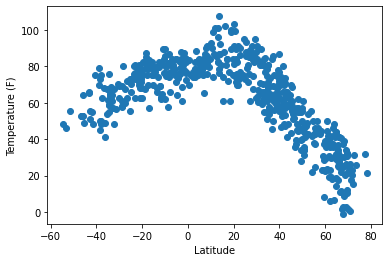

In [8]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Temperature"])
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Humidity Plot

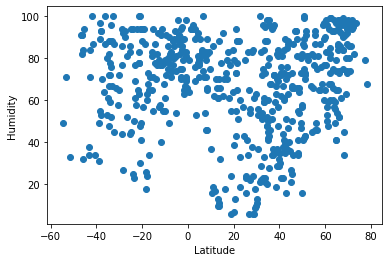

In [9]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"])
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

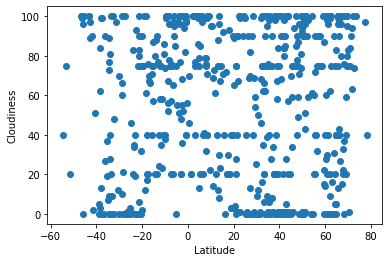

In [10]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness"])
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

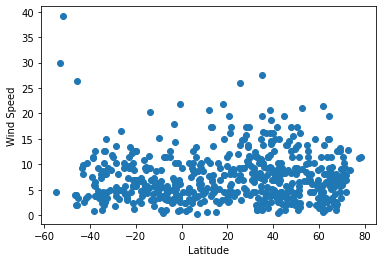

In [11]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed"])
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [36]:
#create dataframes for resepctive hemispheres 
northern_hem_df = city_weather_df.query(f"Latitude > 0")
southern_hem_df = city_weather_df.query(f"Latitude < 0")

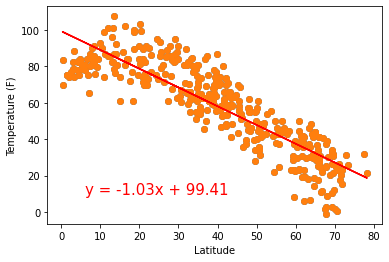

In [58]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Temperature"]

plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Temperature"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

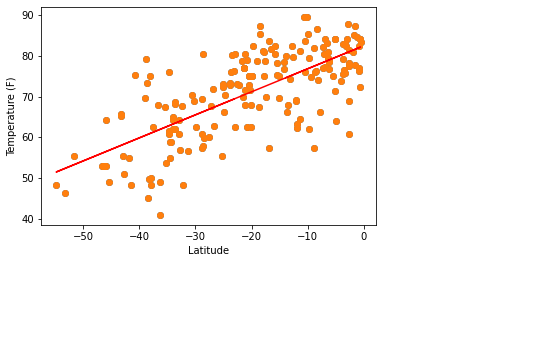

In [61]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Temperature"]

plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Temperature"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

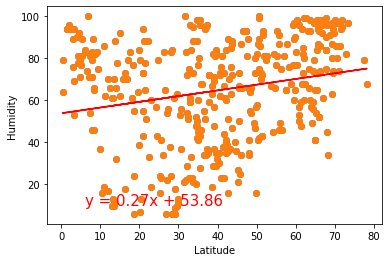

In [63]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Humidity"]

plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

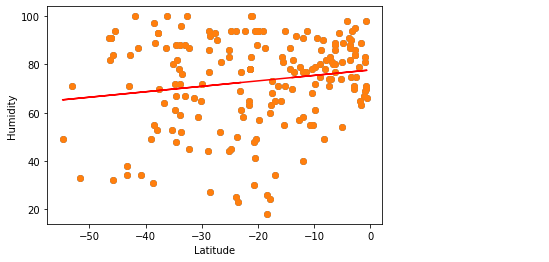

In [64]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Humidity"]


plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

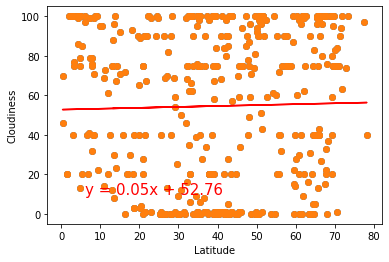

In [65]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Cloudiness"]

plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

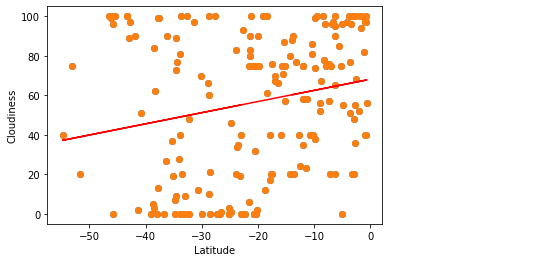

In [66]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Cloudiness"]

plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [1]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Wind Speed"]

plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

NameError: name 'northern_hem_df' is not defined

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

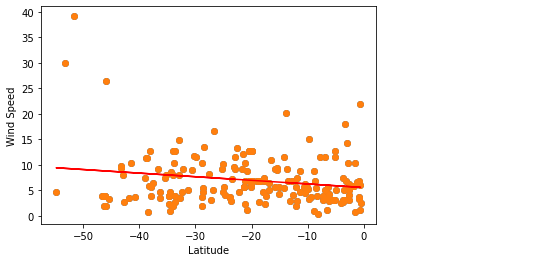

In [68]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Wind Speed"]

plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()